# Logistic Regression
* Logistic Regression is a machine learning algorithm that hlep predict the out-come of a categorical dependent
  variable, based on one or more predictor variables.
* It's commonly used for Binary Classification problems, where the out-come can be One of Two possible classes
* (e.g., 0/1, yes,/no,...ect., )

## Weather trends analysis
Predict whether it will rain or not

###  1. import necessary libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

## 1: Load Your Data

In [72]:
data = pd.read_csv(r"C:\Users\sonic\Downloads\weatherHistory.csv.zip")

In [73]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [74]:
data.shape

(96453, 12)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [76]:
data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

### Handle Missing Values 
* you can see 517 missing values in the 'Precip Type' column. Since it's a small percentage of the total row,
  you can drop the rows with missing values

<Axes: >

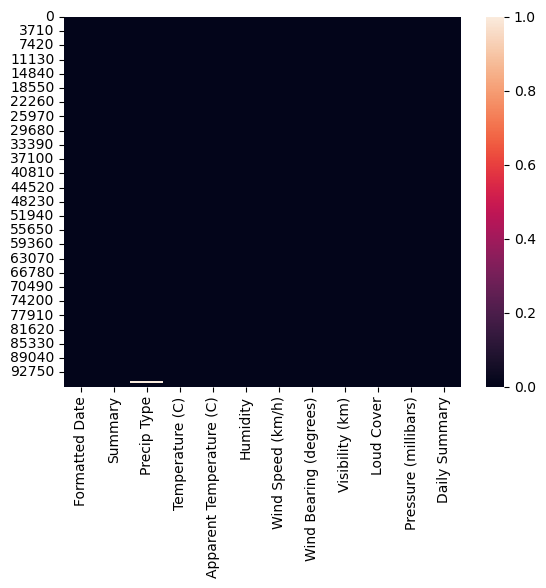

In [77]:
sns.heatmap(data.isnull()) 

### You can see that this chart displays a dark color from 0.0 to 0.2, which indicates that there are missing values.

 ### So now I drop this column.

In [78]:
data = data.dropna (subset=['Precip Type'])         

In [79]:
data.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

### We create a missing values chart.

isnull().sum() it will be shown Zero means nothing is missing.

<Axes: >

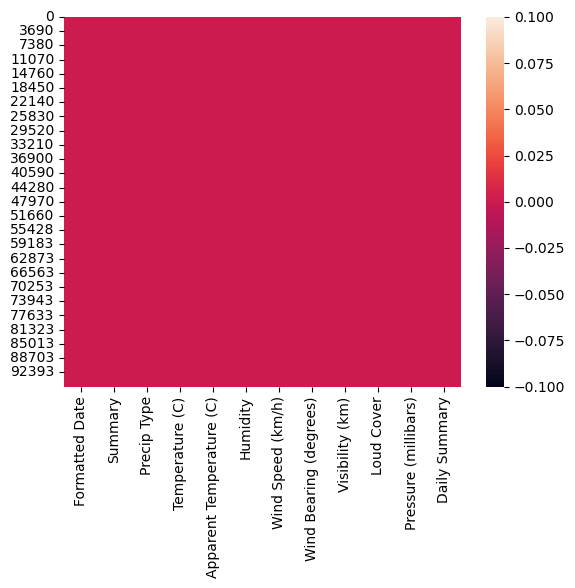

In [80]:
sns.heatmap(data.isnull())

### Now you can see the differences between both the charts.

### Now this chart will display 0.000 to 0.025. There are no missing values.

### Distribution of variables

## Correlation Heatmap 
### To check which features are most related to ' Will_Rain'

In [81]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

ValueError: could not convert string to float: '2006-04-01 00:00:00.000 +0200'

<Figure size 1000x600 with 0 Axes>

## Feature Distribution 
### Vaisualize temperature of humidity distribution for rain / no rain.

In [82]:
sns.boxplot(x = 'Will_Rain', y = 'Humidity', data =data)
plt.suptitle("Humidity Distribution by Rain")

plt.show()

ValueError: Could not interpret value `Will_Rain` for `x`. An entry with this name does not appear in `data`.

In [83]:
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

### Convert'Precip Type' to Binary
Create a new column 'Will_Rain' that is 1 if 'Precip Type' is 'rain' and 0 otheirwise.  (I used Lambda funcation)

In [84]:
data[ 'Will_Rain'] = data['Precip Type'].apply(lambda x: 1 if x == 'rain' else 0)                                       

## Drop Non-Numeric Columns 
  Drop columns that are not numeric or relevant for the analysis.

In [85]:
data = data.drop(columns = ['Formatted Date','Summary', 'Precip Type','Daily Summary'])

# Define Features and  Target
### Define the features (x) and target (y) variables

In [86]:
X = data.drop(columns = ['Will_Rain'])
y = data['Will_Rain']

## Train - Test split
* Split the data into training and testing sets.

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Apply Logistic Regression
 * Apply logistic regression to the training data.

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model = LogisticRegression(max_iter = 1000)

In [21]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

## Evaluate the model
* Evaluate the model using the testing data.

In [22]:
y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 2097     1]
 [   27 17063]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2098
           1       1.00      1.00      1.00     17090

    accuracy                           1.00     19188
   macro avg       0.99      1.00      1.00     19188
weighted avg       1.00      1.00      1.00     19188



# charts
## Rain Frequency Count 
### Visualize the count of rain no rain.

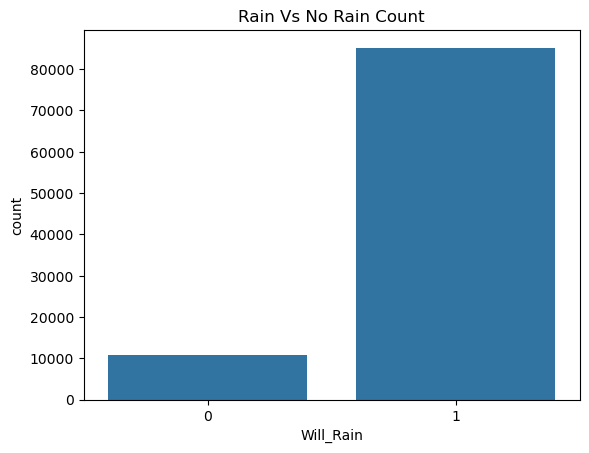

In [25]:
sns.countplot(x = 'Will_Rain', data = data)
plt.title("Rain Vs No Rain Count")
plt.show()